In [2]:
import matplotlib

import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [14]:

date1='realfast11jjem2sh'
date2='realfast19jjem2st'

params=4
istart=1
ivalues=20

rbtoeq=np.zeros(ivalues)
ubtoeq=np.zeros(ivalues)
reqtob=np.zeros(ivalues)
ueqtob=np.zeros(ivalues)

for k2 in range(0,ivalues):
    x=[]
    ratefile = open('/home/richard/mastergit/pythonplots/arrhenius_analytics/param%s%d.txt' %('new'+date1+'new'+date2,k2),'r')
    for k4 in ratefile:
        row=k4.split()
        x.append(float(row[0]))
    ax=np.array(x)
    rbtoeq[k2]=x[0]
    ubtoeq[k2]=x[1]
    reqtob[k2]=x[2]
    ueqtob[k2]=x[3]

In [5]:
def r(r0,U,D):
	return r0*np.exp(-U/D)
def deff(rp,up,rm,um,v,D):
	return (v**2*r(rp,up,D)*r(rm,um,D))/((r(rp,up,D)+r(rm,um,D))**3)

In [11]:
file=open('/home/richard/mastergit/NetBeansProjects/detmodel/countI9a.txt',"r")
col,colx=[],[]
for k in file:
    row=k.split()
    colx.append(float(row[0]))
    col.append(float(row[1]))
cola=np.array(col)
colxa=np.array(colx)

In [16]:
N=50000000
dt=0.0005
T=N*dt

In [8]:
colorv=['y','g','b','r','c']
pv=np.arange(0,ivalues)

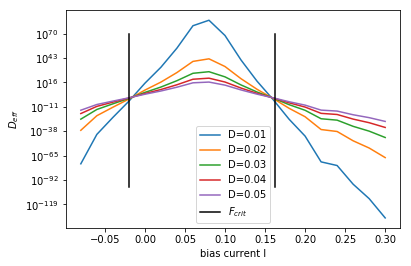

In [39]:
vec=np.linspace(1,5,num=5,endpoint=True)
l=len(vec)
D=0.01
plt.figure()
plt.xlabel('bias current I')
plt.ylabel('$D_{eff}$')
for n in range(0,l):
	plt.plot((pv-4)*0.02,deff(rbtoeq[pv],ubtoeq[pv],reqtob[pv],ueqtob[pv],cola[2*pv+12]/T,D*vec[n]),label='D=%.2f'%(D*vec[n]))

plt.plot([0.163, 0.163], [10**(-100), 10**(70)], color='black', linestyle='-')
plt.plot([-0.02, -0.02], [10**(-100),10**70], color='black', linestyle='-',label='$F_{crit}$')
plt.legend()
plt.yscale('log')

In [26]:
vvalues=51
istepv=0.01
dvdi=np.zeros(vvalues-2)
for z in range(0,vvalues-2):
    dvdi[z]=(cola[z+2]-cola[z])/(2*istepv)
dvdipl=np.zeros(ivalues-2)
for z in range(0,ivalues-2):
    dvdipl[z]=dvdi[13+2*z]
vpl=np.zeros(ivalues-2)
for z in range(0,ivalues-2):
    vpl[z]=cola[12+2*z]

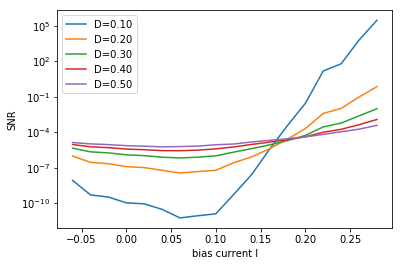

In [41]:
vecs=np.linspace(1,5,num=5,endpoint=True)
ls=len(vecs)
Ds=0.1
Dsv=Ds*vecs
istep=0.02
drdi=np.zeros((ls,ivalues-2))
rp=np.zeros((ls,ivalues-2))
rm=np.zeros((ls,ivalues-2))
for d in range(0,ls):
    for z in range(0,ivalues-2):
        drdi[d][z]=(r(rbtoeq[z+2],ubtoeq[z+2],Dsv[d])/r(reqtob[z+2],ueqtob[z+2],Dsv[d])-r(rbtoeq[z],ubtoeq[z],Dsv[d])/r(reqtob[z],ueqtob[z],Dsv[d]))/(2*istep)
        rp[d][z]=r(rbtoeq[z+1],ubtoeq[z+1],Dsv[d])
        rm[d][z]=r(reqtob[z+1],ueqtob[z+1],Dsv[d])
    
pvc=np.linspace(-0.06,0.28,num=ivalues-2,endpoint=True)
plt.figure()
plt.xlabel('bias current I')
plt.ylabel('SNR')
for n in range(0,l):
	plt.plot(pvc,snr(rp[n,:],rm[n,:],vpl,dvdipl,drdi[n,:]),label='D=%.2f'%Dsv[n])
plt.yscale('log')
plt.legend()
#plt.xlim(0.15,0.2)
#plt.ylim(10**(-7),0.1)

In [27]:
def deffrate(v,rp,rm):
    return (v**2*rp*rm)/((rp+rm)**3)
def snr(rp,rm,v,dvdi,drdi):
    return (dvdi/(1+rp/rm)-v*drdi/((1+rp/rm)**2))/deffrate(v,rp,rm)